In [4]:
import pandas as pd

In [6]:
data = pd.read_csv("C:/Users/Hp/Desktop/ML Assignments/Heart (1).csv")

In [8]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [10]:
print('The shape of the dataset is :',data.shape)

The shape of the dataset is : (303, 15)


In [12]:
print('The Column Names :',data.columns.tolist())

The Column Names : ['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']


In [14]:
# data cleaning
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [16]:
data.isnull().sum()/data.shape[0]*100

Unnamed: 0    0.000000
Age           0.000000
Sex           0.000000
ChestPain     0.000000
RestBP        0.000000
Chol          0.000000
Fbs           0.000000
RestECG       0.000000
MaxHR         0.000000
ExAng         0.000000
Oldpeak       0.000000
Slope         0.000000
Ca            1.320132
Thal          0.660066
AHD           0.000000
dtype: float64

In [18]:
import seaborn as src
import matplotlib.pyplot as plt

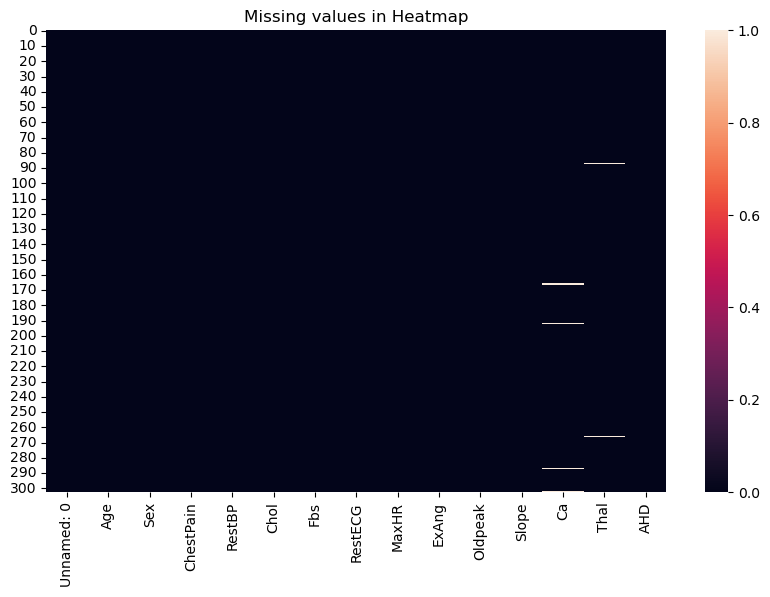

In [19]:
plt.figure(figsize=(10,6))
src.heatmap(data.isnull())
plt.title('Missing values in Heatmap')
plt.show()

In [20]:
data['Ca'].fillna(data['Ca'].mean(),inplace=True)
data['Thal'].fillna(data['Thal'].mode()[0],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_16812\628391703.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ca'].fillna(data['Ca'].mean(),inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_16812\628391703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [21]:
print('Missing Values\n', data.isnull().sum())


Missing Values
 Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


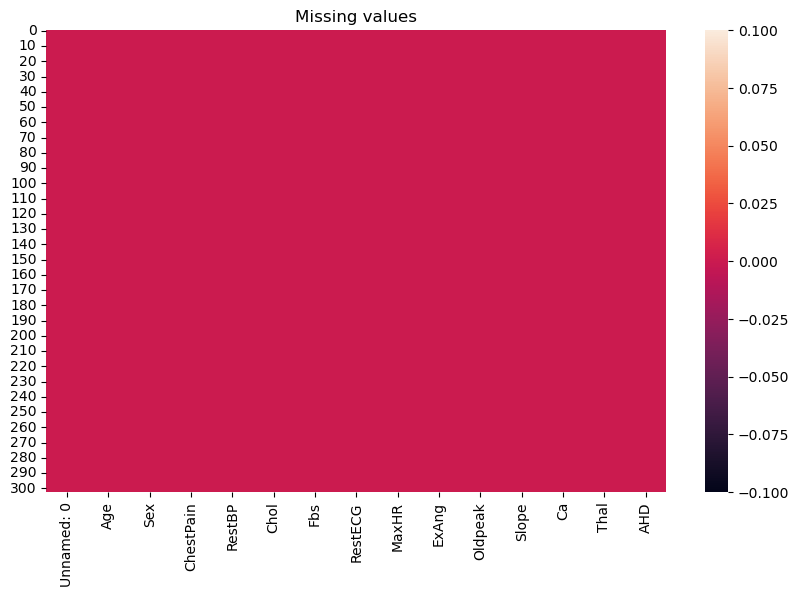

In [22]:
plt.figure(figsize=(10,6))
src.heatmap(data.isnull())
plt.title('Missing values')
plt.show()

In [23]:
#Data-Transformation
from sklearn.preprocessing import StandardScaler

In [25]:
numeric_cols = data.select_dtypes(include=['float64','int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [26]:
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [46]:
data_final = data.copy()
data_final.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,-1.726344,0.948726,0.686202,typical,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,fixed,No
1,-1.714911,1.392002,0.686202,asymptomatic,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,normal,Yes
2,-1.703478,1.392002,0.686202,asymptomatic,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,reversable,Yes
3,-1.692046,-1.932564,0.686202,nonanginal,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,normal,No
4,-1.680613,-1.489288,-1.457296,nontypical,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,normal,No


In [31]:
#Training and Testing
from sklearn.model_selection import train_test_split

In [32]:
train_data,test_data = train_test_split(data_final,test_size = 0.25,random_state = 42)

In [34]:
print("Training data" ,train_data.shape[0])
print("Testingg data" ,test_data.shape[0])


Training data 227
Testingg data 76
